Introduction

This project carried out a long-short portfolio via machine learning models and evaluated the performance based on the result. The stack model combines the Neural Network Classifier and ensemble method as the final estimator to improve predictive performance by combining the strengths of individual models. The model successfully identifies stock turning and process long and short in the portfolio, which means the long and short portfolio might be profitable. However, the individual long or short positions are not sustainable after considering transaction costs. The positive performance of the Long-Short strategy might be driven by solid performance differentials between the Long and Short groups. Still, it is crucial to note that transaction costs could significantly drag returns. Therefore, it is essential to consider whether the excess returns justify the risks and costs associated with maintaining the strategy.

Setup

The project setup, including the dataset, model selection, application, and setup of the long-short portfolio, will be covered in this section.

The dataset required to be clean, and feature engineering is needed before training the model. After the dataset is loaded (see appendix), the data cleaning process is done by dropping missing values to avoid error and calculating relative return by:
$$0.1 * \frac{volume}{share outstanding}$$
In addition, The outliers are removed based on the quantiles of returns. In this project, the top 1% and the lowest 1% are removed. The data is sorted chronologically for each stock identifier (permno). This is essential for further analysis since logistic regression will be the final estimator for this project. The data labels for classification are created using deciles of negative returns, which aims to predict a downturn for the long-short portfolio. The Target variables for future returns are also prepared using shifts to align current features with future outcomes, which will be used for predictive modelling. Furthermore, size and momentum factors will be used to predict the target. The momentum features are calculated to capture trends and reversals in stock prices over various time frames of 3, 6, 9, and 12 months representatively.

size factor = log (market cap)
-$k$-month momentum factor: return over past $k$-months excluding the latest month return:

  Let $r_t$ denote the return over the period from $t-1$ to $t$. Then, $k$-month momentum at $t$ is given by    
    
$    
\begin{align}
MOM_k & = (1+r_{t-1})(1+r_{t-2})\cdots (1+r_{t-k+1}) -1\\
      & = \frac{(1+r_{t-1})\cdots (1+r_1)}{(1+r_{t-k})\cdots (1+r_1)} -1\\
      & = \frac{cumret_{t-1}}{cumret_{t-k}} - 1
\end{align}
$ 

In this project, principal component analysis, or PCA, is also used to reduce the dimensionality of the data by keeping only the features that most significantly contribute to its variance. To minimize data size and remove noise for future use, it will retain lower-order principal components and disregard higher-order ones. Standardized features are used in model training going forward. Following feature engineering, additional data cleaning is carried out to remove missing and infinite data for model training and confirm that all prices and shares outstanding are positive. The dataset is divided into training and testing sets in a 70:30 ratio (with a cutoff date of January 1, 2010). The dataset is normalized using a scaling feature, which enhances the performance of the models used in the project.

One of the most important factors in the model selection process is the correlation test. The test is run following a feature and target inspection. The decision between a regression model and a classification model will be guided by the findings. A classification model is chosen for this project.

Neural networks are commonly employed for statistical analysis and data modeling, providing an alternative to traditional nonlinear regression and cluster analysis methods. Therefore, it is utilized in this project. As Gurney (2003) explains, a neural network is a complex network of interconnected processing elements that draw inspiration from the functionality of animal neurons. The network's processing ability is determined by the interunit connection strengths, or weights, which are acquired through a process of adaptation or learning from a set of training patterns. For this project, the neural network is utilized to classify stock movements and make predictions about whether the stock price will decrease, increase, or remain stable within a given timeframe. According to Wu & Feng (2018), a neural network has the ability to handle various types of data, including incomplete, fuzzy, uncertain, or regular data. It begins with understanding how the market price is determined. A precise and dependable model is then developed, taking into account various intricate and constantly shifting factors such as the impact of commodity prices on households, per capita disposable income, loan interest rates, and urbanization levels. Hopefully, it would offset the lack of other marcoeconomic factors that will affect the price. Meanwhile, financial instruments are categorized based on their historical performance and other financial indicators. As per Wu & Feng (2018), the aim of using an artificial neural network is to develop a credit risk model that aligns with the specific risk factors, calculate the risk evaluation coefficient, and subsequently find a solution for the real-world problem. In due course, the model will have the capability to identify various market conditions, including periods of optimism, pessimism, or instability.

Nerual Network Formula:
$$ y = f\left(\sum_{i=1}^{n} w_i x_i + b \right) $$
where:
- $y$ is the output
- $x_i$ represents the input features
- $w_i$ represents the weights associated with the input features
- $b$ is the bias term
- $f$ is the activation function (e.g., sigmoid, tanh, ReLU)


Meanwhlie, Extreme Gradient Boosting (XGBoost) greatly enhances prediction accuracy, effectively deals with intricate nonlinear relationships in the data, and offers protection against overfitting. As per Dietterich (2000), Ensemble methods involve the use of learning algorithms to create a group of classifiers. These classifiers then make predictions on new data points, and the final classification is determined by taking a weighted vote of their predictions. In the project of identifying volcanoes on Venus, Cherkauer (1996) trained a remarkable ensemble of 32 neural networks. The 32 networks were created using eight different subsets of the 119 available input features and four different network sizes. The input feature subsets were chosen to categorize features according to different image processing operations, such as PCA. The ensemble classifier achieved a level of performance comparable to that of human experts in volcano identification. In addition, XGBoost incorporates Lasso Regression (L1) and Ridge Regression (L2) regularization techniques, which discourage complex models and mitigate overfitting. Utilizing XGBoost also offers a direct method to analyze the significance of every feature in the ultimate model. It is important to gain insight into the factors that influence the predictions. Thus, the model should be capable of generating scores that reflect the significance of each feature in making predictions. XGBoost is designed to deliver high performance and speed, utilizing multi-threading and distributed computing. In a study conducted by Chen et al. (2018), they investigated a project focused on identifying distributed denial-of-service (DDOS) attacks. These attacks aim to disrupt the entire network within a software-defined network (SDN). The SDN needs to be fast, accurate, and have a low rate of false positives when it comes to detecting attacks. In a highly demanding scenario, Chen et al.(2018) utilized XGBosst to analyze the flow packet data set collected by TcpDump for DDOS detection. The outcome was impressive, with high accuracy, a low false positive rate, and excellent speed and scalability. Thus, XGBoost is ideal for handling sparse data in situations such as high-frequency trading data, where the matrix may contain numerous missing values. In this project, a stack model was utilized along with ensemble methods and neural networks.

XGBoost formula:

$$ \hat{y}_i = \sum_{k=1}^{K} f_k(x_i), \quad f_k \in \mathcal{F} $$
where:
- $\hat{y}_i$ is the predicted output
- $x_i$ is the vector of input features
- $K$ is the number of trees
- $f_k$ represents a decision tree
- $\mathcal{F}$ is the space of all possible CART (Classification and Regression Trees)

Once the stack model has been trained using the provided dataset, it can be applied to a long-short portfolio. Every stock is assigned a score derived from the predictions made by the stacked model. Stocks are evaluated based on these scores, and the top percentile is chosen as a potential long candidate. On the other hand, the bottom percentile is chosen as short candidates. Similar to a quantitative analyst, long-short portfolio management provides a sophisticated approach to leverage various predictive insights that are crucial for maximizing returns and managing risks in financial markets. The result will also show the return after taking into account transaction costs.

The project also implemented techniques to avoid overfitting and reduce computation time. Additionally, the MLP classifier now includes a "early stop" feature. As per Ying (2018), this strategy helps prevent the model from experiencing a slowdown in learning speed, where the accuracy of algorithms reaches a plateau or even deteriorates due to noise learning. Furthermore, the model's output is influenced by a limited set of features through the utilization of PCA (refer to the appendix). This technique helps reduce the impact of features that have minimal influence on the final classification. A model that overfits tends to take into account all features (Ying, 2018). In addition, XGBoost incorporates regularisation techniques to discourage the use of large weights in the model. Given these circumstances, the model is expected to have a lower probability of overfitting.

Result

During the correlation test, a significant negative correlation of -0.832944 indicates that as the target returns decreased, the label value increased. This could potentially result in a decrease in the model's performance. The variables that have the highest positive correlations with tgt_ret are size (0.025361) and label (0.015811). Other features like shroud and ret have very low correlations with tgt_ret. This suggests that larger companies, which can be considered as a measure of market capitalization, may have slightly superior future returns. Curiously, the momentum indicators exhibit a relatively feeble correlation with the return. Put simply, the historical return momentum may not be a reliable indicator of short-term future returns in this dataset. Furthermore, the correlations between dates are not strong, indicating that the time trends may not be statistically significant within the timeline of this dataset. For this situation, it would be more suitable to use non-linear models or machine learning techniques. Hence, the project will utilize a classification model instead of regression, in accordance with the initial plan outlined in the model setup.

Stack Model Result

All portfolios in the Equal-Weight Portfolio generated positive cumulative returns. Among these, the long portfolio outperformed the short portfolio with a cumulative return of 1.227016, reaching 1.700961. Despite yielding the lowest return, the Long-Short portfolio maintains a positive cumulative return of 0.109457. Other statistical quantities, including the mean, standard deviation, and Sharpe ratio, are also subject to this rank. The long portfolio has attained mean, standard deviation, and Sharpe ratio values of 0.007431, 0.030301, and 0.849585, respectively. In contrast, the short portfolio has amassed values of 0.00648, 0.04164, and 0.539043. In contrast, the Long-Short portfolio exhibits respective mean, standard deviation, and Sharpe ratio values of 0.000952, 0.020946, and 0.15743. Nevertheless, a notable change emerges when transaction costs amounting to 0.005 are accounted for. The overall portfolio has encountered a significant decline as a result of transaction expenses. The cumulative returns of the Long and Short classes continue to be positive and fluctuate significantly, whereas the returns of the High-Low and Low classes remain positive and remain unchanged.

|With Costs| H_EW| L_EW| H_L_EW |
|----------|----------|----------|-----------|
| cum   | 0.325063    | 0.09118     | 0.109457|
| mean  | 0.002431    | 0.00148   |0.000952|
| std   | 0.030301   | 0.04164   |0.020946|
| sharpe  | 0.277969    | 0.123085   |0.15743|

Each portfolio in a Value-Weight Portfolio consists of the same holdings of equal weight. Nevertheless, the combined return of the Long and Short portfolios is considerably greater than that of an equal-weight portfolio. Conversely, the Long-short portfolio yields a negative cumulative return. The fact that the long-short portfolios have negative means, standard deviations, and Sharpe ratios is an intriguing result. In contrast, upon accounting for transaction costs, all portfolios comprising the value-weight portfolio exhibit a comparable outcome to the equal-weight portfolio. While the long and short portfolios experience a substantial decline in cumulative returns, they maintain a positive value for the remaining results. With the exception of the standard deviation, the long-short portfolio continues to generate negative results.

| Without Costs| H_VW| L_VW| H_L_VW |
|----------|----------|----------|-----------|
| cum   | 3.606831    | 3.854368     |-0.025047|
| mean  | 0.011341    |  0.01195  |-0.000608|
| std   | 0.03474   | 0.041082    |0.019194|
| sharpe  | 1.130928   | 1.00765   |-0.10982|

| With Costs| H_VW| L_VW| H_L_VW |
|----------|----------|----------|-----------|
| cum   | 1.056729   | 1.306019    |-0.162773|
| mean  | 0.005769   | 0.006842  |-0.001073|
| std   | 0.037769    | 0.044132    |0.018419|
| sharpe  | 0.529116   | 0.53703   |-0.201733|



Discussion

The model's success in identifying stock price turns and apply long short strategy in the profolio. The reuslt suggests that the long and short portfolio could be profitable in the equal-weight portfolio. However, it's important to note that the individual long or short positions are not sustainable after transaction costs are factored in, leading to significant drops in performance. Despite this, costs do not have a significant impact on a long-short portfolio. The underperformance of the Long-Short strategy could be attributed to the solid performance differentials between the Long and Short groups. It's crucial to consider whether the excess returns justify the risks and costs associated with maintaining the strategy. This project anticipates that the long-short strategy will outperform the one-side portfolio. Risk management becomes crucial during the decision-making process when transaction costs are considered. The higher the trading frequency, the more risk in the given market. However, the result did not show that the long-short strategy has the highest potential return compared to the side strategy. According to Jacobs, a long-only investor's ability to profit from the market is limited if they have a negative view of a stock. Meanwhile, those investors who use a short strategy have the potential to enhance returns from active security selection by increasing their leeway to act on insights. A long-short is a portfolio conceived of and constructed as a single, integrated portfolio of long and short positions. According to Jacobs (1999), an integrated optimization long-short portfolio does not need to converge to securities's benchmark weights to control risk, allowing the investor greater flexibility to take active positions. The long-short strategy is often considered better from a risk-adjusted return perspective because it can lower overall portfolio volatility and provide a hedge against market downturns. Therefore, the project expects the Long-Short strategy to outperform the Long/Short-only strategy. Long-short strategies are more likely to be applied and profit from the market than long/short-only strategies. 

While the model did not excel in indicating that the long-short portfolio has the highest cumulative return among all portfolios, it's noteworthy that the impact of costs on the long-short portfolio was not as severe as on the long and short portfolios. This underscores the importance of investors choosing their investment strategy based on the risk they can tolerate. On the other hand, the value-weight portfolio may offer profit compared with equal-weight. The generally higher cumulative returns of value-weight portfolios suggest that larger firms, which are usually weighted more heavily, may offer more substantial and more stable returns. This aligns with the correlation test result, which is the strong correlation of size, suggesting larger firms may offer slightly more predictable or stable returns since larger firms are less volatile. However, the result indicates that the significant change in performance metrics after accounting for transaction costs highlights the importance of considering these costs in trading strategy development, especially high-frequency trading. Moreover, There are risks for a high-low spread strategy since both portfolios show that the Long-Short strategies are not as profitable as the Long or Short strategy or even cause losses after including costs. This demonstrated the risk associated with a high turnover strategy and the importance of robust cost management. In addition, the decline in Sharpe ratios across all cases when costs are considered shows that profitability is not just about absolute returns but also the need to manage volatility and costs effectively.

Limitation

Approximately 13.84 percent precision characterizes the stack model implemented in this endeavor. There are multiple justifications for this. To begin with, the absence of data would result in diminished precision due to the model's reliance on correlation analysis to identify linear associations. Particularly in regard to stock returns, financial markets frequently display nonlinear tendencies that can be influenced by a variety of macroeconomic factors, news, and sentiment. The correlation test further revealed that the feature selection is constrained, as the utilized features (e.g., mom3m and mom6m) exhibited negligible correlation. Consequently, these features lack predictive capability and fail to capture crucial dynamics. Lastly, model training may not benefit from combining datasets of the same type if the resulting model requires more features to be satisfactory. Neural networks and support vector machines may benefit from engineered features based on ratios, whereas gradient-boosting machines may benefit from engineered features based on counts, according to Heaton (2016). Despite the fact that the project has already optimized the engineered features to their highest possible potential, the model must still deliver its optimal performance for this endeavor.

By enhancing feature engineering, these issues might be eliminated in subsequent research. Macroeconomic indicators, news sentiment analysis, or more granular trading data such as bid-ask spreads and order book data could be incorporated into the model. This will benefit model training and feature enhancement, thereby contributing to the model's accuracy and providing fresh insights. In addition, future consideration would be given to model updates utilizing adaptive learning, as retraining the model continuously on new data or implementing a rolling training window would aid in maintaining its performance.


Conclusion

In summary, the project effectively utilizes a stacked classification model in conjunction with a neural network and XGBoost to discern stocks exhibiting superior performance relative to the stocks with the lowest returns. This suggests that the long-short portfolio could potentially yield favorable outcomes. The individual long or short positions, however, are unsustainable when transaction costs are considered. Significant performance disparities between the Long and Short groups could potentially support the Long-Short strategy's performance. However, it is imperative to acknowledge that returns may be considerably slowed down by transaction costs. Consequently, it is critical to evaluate whether the additional profits outweigh the expenses and risks associated with sustaining the strategy. Given that the model's performance falls short of expectations, efforts must be made to enhance its functionality.

References

Cherkauer, K. J. (1996, March). Human expert-level performance on a scientific image analysis task by a system using combined artificial neural networks. In Working notes of the AAAI workshop on integrating multiple learned models (Vol. 21).

Chen, Z. et al. (2018) ‘XGBoost classifier for ddos attack detection and analysis in SDN-based cloud’, 2018 IEEE International Conference on Big Data and Smart Computing (BigComp) [Preprint]. doi:10.1109/bigcomp.2018.00044. 

Dietterich, T. G. (2000, June). Ensemble methods in machine learning. In International workshop on multiple classifier systems (pp. 1-15). Berlin, Heidelberg: Springer Berlin Heidelberg.

Gurney, K.N. (2003) An introduction to neural networks. Boca Raton: CRC Press. 

Heaton, J. (2016) ‘An empirical analysis of feature engineering for Predictive Modeling’, SoutheastCon 2016 [Preprint]. doi:10.1109/secon.2016.7506650. 

Jacobs, B. I., Levy, K. N., & Starer, D. (1999). Long-short portfolio management: An integrated approach. Journal of Portfolio Management, 25, 23-32.

Wu, Y. C., & Feng, J. W. (2018). Development and application of artificial neural network. Wireless Personal Communications, 102, 1645-1656.

Ying, X. (2019) ‘An overview of overfitting and its solutions’, Journal of Physics: Conference Series, 1168, p. 022022. doi:10.1088/1742-6596/1168/2/022022. 

Appendix

In [12]:
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,TimeSeriesSplit, GridSearchCV
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

InteractiveShell.ast_node_interactivity = "all"

In [13]:
plt.rcParams['figure.figsize']=(15,10)

In [14]:
# Load and preprocess data
crsp = pd.read_csv('crsp_sum.csv')
crsp['date'] = pd.to_datetime(crsp['date'])
crsp['prc'] = crsp['prc'].abs()
crsp['relvol'] = 0.1 * crsp['vol'] / crsp['shrout']
crsp.dropna(inplace=True)

# Removing outliers
crsp = crsp[(crsp['ret'] >= crsp['ret'].quantile(0.01)) & (crsp['ret'] <= crsp['ret'].quantile(0.99))]

# Sorting for chronological order
crsp.sort_values(['permno', 'date'], inplace=True)

# Labeling and target creation
crsp['label'] = crsp.groupby('date')['ret'].transform(lambda x: pd.qcut(-x, 10, labels=False, duplicates='drop'))
crsp['tgt_ret'] = crsp.groupby('permno')['ret'].shift(-1)
crsp['tgt_label'] = crsp.groupby('permno')['label'].shift(-1)
crsp.dropna(inplace=True)

# Feature Engineering: Momentum
for months in [3, 6, 9]:
    gb = crsp.groupby('permno')
    crsp[f'mom{months}m'] = gb['ret'].transform(lambda x: (1 + x).cumprod()).shift(1) / gb['ret'].transform(lambda x: (1 + x).cumprod()).shift(months) - 1

# Cleanup
crsp = crsp[(crsp['prc'] > 0) & (crsp['shrout'] > 0)]
crsp['size'] = np.log(crsp['prc'] * crsp['shrout'])
crsp.replace([np.inf, -np.inf], np.nan, inplace=True)
crsp.dropna(subset=['ret', 'mom3m', 'mom6m', 'mom9m'], inplace=True)

# Train-test split
train = crsp[crsp.date < '2010-01-01']
test = crsp[crsp.date >= '2010-01-01']

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(train[['ret', 'mom3m', 'mom6m', 'mom9m']])
X_test = scaler.transform(test[['ret', 'mom3m', 'mom6m', 'mom9m']])
y_train = train['tgt_label']
y_test = test['tgt_label']

pca = PCA(n_components=4)  # Adjust the number of components if PCA is used
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# MLP Classifier
clf = MLPClassifier(hidden_layer_sizes=(32,32), activation='relu', alpha=0,
                    max_iter=100, verbose=True, early_stopping=True,
                    validation_fraction=0.3, n_iter_no_change=5)
clf.fit(X_train_pca, y_train)

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                            subsample=0.8, colsample_bytree=0.8, random_state=42,
                            use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_pca, y_train)

# Predictions and Evaluation
pred_probs_mlp = clf.predict_proba(X_test_pca)[:, 1]
pred_probs_xgb = xgb_clf.predict_proba(X_test_pca)[:, 1]
combined_pred_probs = (pred_probs_mlp + pred_probs_xgb) / 2
combined_pred_class = (combined_pred_probs > 0.5).astype(int)

print("MLP Classifier Accuracy:", accuracy_score(y_test, clf.predict(X_test_pca)))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_clf.predict(X_test_pca)))
print("Combined Model Accuracy:", accuracy_score(y_test, combined_pred_class))
print("Combined Model Report:\n", classification_report(y_test, combined_pred_class))

# Stacking Classifier
estimators = [('xgb', xgb_clf), ('mlp', clf)]
stacker = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacker.fit(X_train_pca, y_train)
stacked_pred = stacker.predict(X_test_pca)

print("Stacking Model Accuracy:", accuracy_score(y_test, stacked_pred))

C:\Users\danie\AppData\Local\Temp\ipykernel_21212\3881832063.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp['size'] = np.log(crsp['prc'] * crsp['shrout'])
C:\Users\danie\AppData\Local\Temp\ipykernel_21212\3881832063.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_21212\3881832063.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Iteration 1, loss = 2.28217574
Validation score: 0.127104
Iteration 2, loss = 2.28124988
Validation score: 0.127022
Iteration 3, loss = 2.28101155
Validation score: 0.127992
Iteration 4, loss = 2.28063743
Validation score: 0.128306
Iteration 5, loss = 2.27996193
Validation score: 0.128098
Iteration 6, loss = 2.27939143
Validation score: 0.128337
Iteration 7, loss = 2.27919369
Validation score: 0.128279
Iteration 8, loss = 2.27909281
Validation score: 0.128548
Iteration 9, loss = 2.27899444
Validation score: 0.128713
Iteration 10, loss = 2.27898800
Validation score: 0.128301
Iteration 11, loss = 2.27894180
Validation score: 0.128318
Iteration 12, loss = 2.27892311
Validation score: 0.128684
Iteration 13, loss = 2.27885809
Validation score: 0.128209
Iteration 14, loss = 2.27890280
Validation score: 0.128296
Iteration 15, loss = 2.27884144
Validation score: 0.128183
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


MLPClassifier(alpha=0, early_stopping=True, hidden_layer_sizes=(32, 32),
              max_iter=100, n_iter_no_change=5, validation_fraction=0.3,
              verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

MLP Classifier Accuracy: 0.13449487911031893
XGBoost Accuracy: 0.13871958817559957
Combined Model Accuracy: 0.10002930779766854


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Combined Model Report:
               precision    recall  f1-score   support

         0.0       0.10      1.00      0.18    100344
         1.0       0.00      0.00      0.00    100557
         2.0       0.00      0.00      0.00    100408
         3.0       0.00      0.00      0.00    100368
         4.0       0.00      0.00      0.00    100277
         5.0       0.00      0.00      0.00    100140
         6.0       0.00      0.00      0.00    100150
         7.0       0.00      0.00      0.00    100349
         8.0       0.00      0.00      0.00    100436
         9.0       0.00      0.00      0.00    100117

    accuracy                           0.10   1003146
   macro avg       0.01      0.10      0.02   1003146
weighted avg       0.01      0.10      0.02   1003146

Iteration 1, loss = 2.28256894
Validation score: 0.128264
Iteration 2, loss = 2.28135494
Validation score: 0.128186
Iteration 3, loss = 2.28084402
Validation score: 0.126540
Iteration 4, loss = 2.27993325
Validation s

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lear...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('mlp',
                                MLPClassifier(alpha=0, early_stopping=True,
                                              hidden_layer_sizes=(32, 32),
                                              max_iter=100, n_iter_no_change=5,
                                              validation_fraction=0.3,
                                              verbose=True))],
                   final_estimator=LogisticRegression())

Stacking Model Accuracy: 0.13847136907289667


In [15]:
crsp.describe()

,date,permno,prc,vol,ret,shrout,relvol,label,tgt_ret,tgt_label,mom3m,mom6m,mom9m,size
count,3646389,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06,3.646389e+06
mean,1999-12-08 06:40:43.720623744,5.823162e+04,3.569970e+01,9.866868e+04,6.360582e-03,5.561744e+04,1.604746e-01,4.486644e+00,6.304450e-03,4.485825e+00,1.467573e+01,3.308325e+01,4.859956e+01,1.191220e+01
min,1970-01-30 00:00:00,1.000000e+04,1.510000e-02,0.000000e+00,-3.869863e-01,1.000000e+00,0.000000e+00,0.000000e+00,-3.869863e-01,0.000000e+00,-9.999826e-01,-9.999894e-01,-9.999878e-01,1.313388e+00
25%,1989-11-30 00:00:00,2.905000e+04,6.125000e+00,1.170000e+03,-5.654850e-02,4.129000e+03,2.183673e-02,2.000000e+00,-5.637395e-02,2.000000e+00,-8.196722e-02,-1.333333e-01,-1.725352e-01,1.033719e+01
50%,1999-11-30 00:00:00,6.881400e+04,1.437500e+01,6.344000e+03,1.038962e-03,1.185700e+04,5.601755e-02,4.000000e+00,1.212149e-03,4.000000e+00,7.157959e-03,2.002675e-02,3.164257e-02,1.180630e+01
75%,2011-03-31 00:00:00,8.356600e+04,2.770000e+01,3.708900e+04,6.127815e-02,3.633400e+04,1.349508e-01,7.000000e+00,6.122449e-02,7.000000e+00,9.457111e-02,1.672102e-01,2.304271e-01,1.337219e+01
max,2021-11-30 00:00:00,9.343600e+04,4.360000e+05,1.900322e+08,5.483871e-01,2.920640e+07,1.985160e+03,9.000000e+00,5.483871e-01,9.000000e+00,7.208315e+06,8.604497e+06,8.187583e+06,2.172094e+01
std,NaN,2.876340e+04,1.629483e+03,6.894500e+05,1.242809e-01,2.584505e+05,2.142527e+00,2.871367e+00,1.242727e-01,2.870833e+00,6.842018e+03,9.758677e+03,1.161568e+04,2.208972e+00


Inspect the features and the target

,date,permno,prc,vol,ret,shrout,relvol,label,tgt_ret,tgt_label,mom3m,mom6m,mom9m,size
date,1.000000,0.213184,0.012063,0.121134,-0.001145,0.133754,0.048969,0.003465,-0.001229,0.003501,-0.002173,-0.003199,-0.003707,0.364895
permno,0.213184,1.000000,-0.011401,0.012223,-0.005463,-0.025975,0.014024,0.007610,-0.005306,0.007434,0.000539,0.000826,0.001134,0.048351
prc,0.012063,-0.011401,1.000000,0.000198,0.001680,0.000235,-0.000117,-0.002645,0.000528,-0.001577,-0.000030,-0.000046,-0.000058,0.034838
vol,0.121134,0.012223,0.000198,1.000000,0.001619,0.603081,0.083544,-0.001987,-0.001542,0.001261,-0.000296,-0.000466,-0.000569,0.237752
ret,-0.001145,-0.005463,0.001680,0.001619,1.000000,0.002314,0.003437,-0.833105,0.001738,0.021578,0.000061,-0.000837,-0.000493,0.077823
shrout,0.133754,-0.025975,0.000235,0.603081,0.002314,1.000000,0.001701,-0.006083,0.002306,-0.006141,-0.000412,-0.000640,-0.000780,0.364321
relvol,0.048969,0.014024,-0.000117,0.083544,0.003437,0.001701,1.000000,-0.001087,-0.005444,0.006150,0.000052,0.000049,0.000066,0.006303
label,0.003465,0.007610,-0.002645,-0.001987,-0.833105,-0.006083,-0.001087,1.000000,0.015811,-0.017336,0.000134,0.000843,0.000526,-0.092775
tgt_ret,-0.001229,-0.005306,0.000528,-0.001542,0.001738,0.002306,-0.005444,0.015811,1.000000,-0.832944,-0.000703,-0.001137,-0.000903,0.025361
tgt_label,0.003501,0.007434,-0.001577,0.001261,0.021578,-0.006141,0.006150,-0.017336,-0.832944,1.000000,0.000529,0.001328,0.000702,-0.048868


tgt_ret      1.000000
size         0.025361
label        0.015811
shrout       0.002306
ret          0.001738
prc          0.000528
mom3m       -0.000703
mom9m       -0.000903
mom6m       -0.001137
date        -0.001229
vol         -0.001542
permno      -0.005306
relvol      -0.005444
tgt_label   -0.832944
Name: tgt_ret, dtype: float64

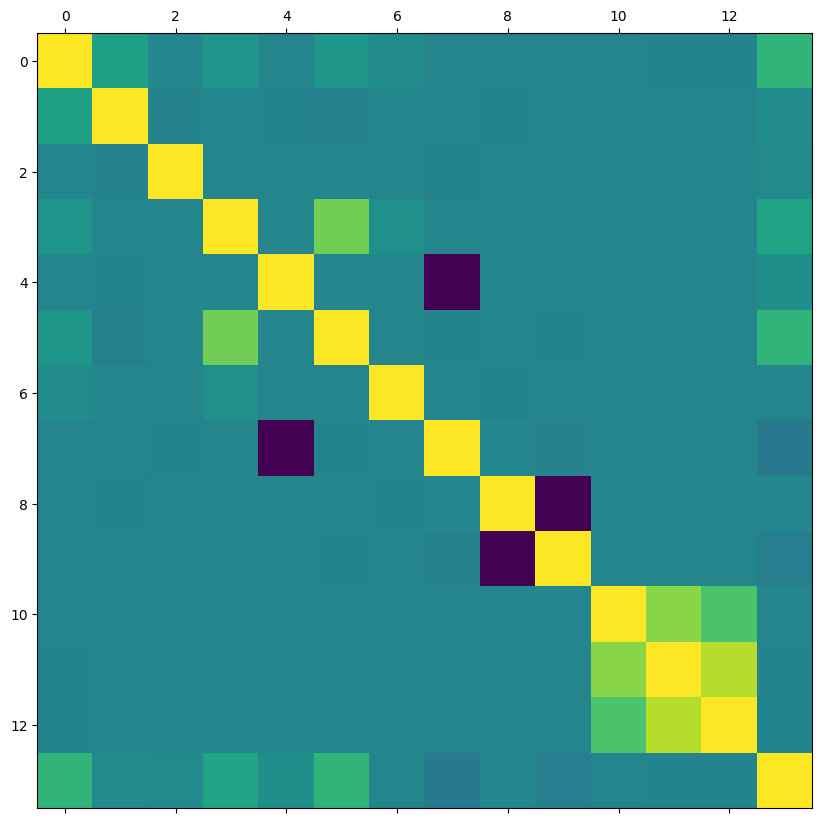

In [16]:
# Check correlations
crsp.corr() # correlations of all pairs
crsp.corr().tgt_ret.sort_values(ascending=False) # correlations between the target and the features.
plt.matshow(crsp.corr())

In [17]:
import pickle

fpath = 'stacker_model.pickle' # file name 


# Save
pickle.dump(stacker, open(fpath, 'wb'))

# Load
stacker = pickle.load(open(fpath, 'rb'))

x_cols = ['ret', 'mom3m', 'mom6m', 'mom9m']

In [18]:
# Check the test set
test

,date,permno,prc,vol,ret,shrout,relvol,label,tgt_ret,tgt_label,mom3m,mom6m,mom9m,size
308,2010-01-29,10001,10.060000,3104.0,-0.018932,4361.0,0.071176,4,-0.000656,6.0,0.170869,0.295711,0.262418,10.689024
309,2010-02-26,10001,10.008400,1510.0,-0.000656,4361.0,0.034625,6,0.020643,6.0,0.140610,0.206770,0.234886,10.683881
310,2010-03-31,10001,10.170000,2283.0,0.020643,4361.0,0.052350,6,0.124385,1.0,-0.019576,0.191344,0.210536,10.699899
311,2010-04-30,10001,11.390000,3350.0,0.124385,6070.0,0.055189,1,0.004829,1.0,0.019973,0.171645,0.296569,11.143850
312,2010-05-28,10001,11.400000,3451.0,0.004829,6071.0,0.056844,1,-0.043421,4.0,0.147596,0.308101,0.383975,11.144892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222952,2021-07-30,93436,687.200012,4472791.0,0.011034,990015.0,0.451790,3,0.070605,1.0,-0.041920,-0.143448,0.751624,20.338101
4222953,2021-08-31,93436,735.719971,3812156.0,0.070605,1001767.0,0.380543,1,0.054042,1.0,0.099133,0.017321,0.210712,20.418126
4222954,2021-09-30,93436,775.479980,3889228.0,0.054042,1004000.0,0.387373,1,0.436530,0.0,0.082419,0.101493,0.042584,20.472985
4222955,2021-10-29,93436,1114.000000,5263955.0,0.436530,1004265.0,0.524160,0,0.027612,1.0,0.128463,0.093087,-0.022747,20.835479


2010-01-29 00:00:00 Number of stocks in H and L: 1502, 4613
2010-02-26 00:00:00 Number of stocks in H and L: 2733, 3182
2010-03-31 00:00:00 Number of stocks in H and L: 2779, 2888
2010-04-30 00:00:00 Number of stocks in H and L: 3201, 2788
2010-05-28 00:00:00 Number of stocks in H and L: 717, 5621
2010-06-30 00:00:00 Number of stocks in H and L: 999, 5215
2010-07-30 00:00:00 Number of stocks in H and L: 2243, 3726
2010-08-31 00:00:00 Number of stocks in H and L: 1253, 4964
2010-09-30 00:00:00 Number of stocks in H and L: 2964, 2872
2010-10-29 00:00:00 Number of stocks in H and L: 2428, 3675
2010-11-30 00:00:00 Number of stocks in H and L: 1999, 4222
2010-12-31 00:00:00 Number of stocks in H and L: 3279, 2761
2011-01-31 00:00:00 Number of stocks in H and L: 2335, 3874
2011-02-28 00:00:00 Number of stocks in H and L: 3225, 2694
2011-03-31 00:00:00 Number of stocks in H and L: 2431, 3466
2011-04-29 00:00:00 Number of stocks in H and L: 2917, 3174
2011-05-31 00:00:00 Number of stocks in H 

<Axes: title={'center': 'Equal-Weight Portfolio Returns'}>

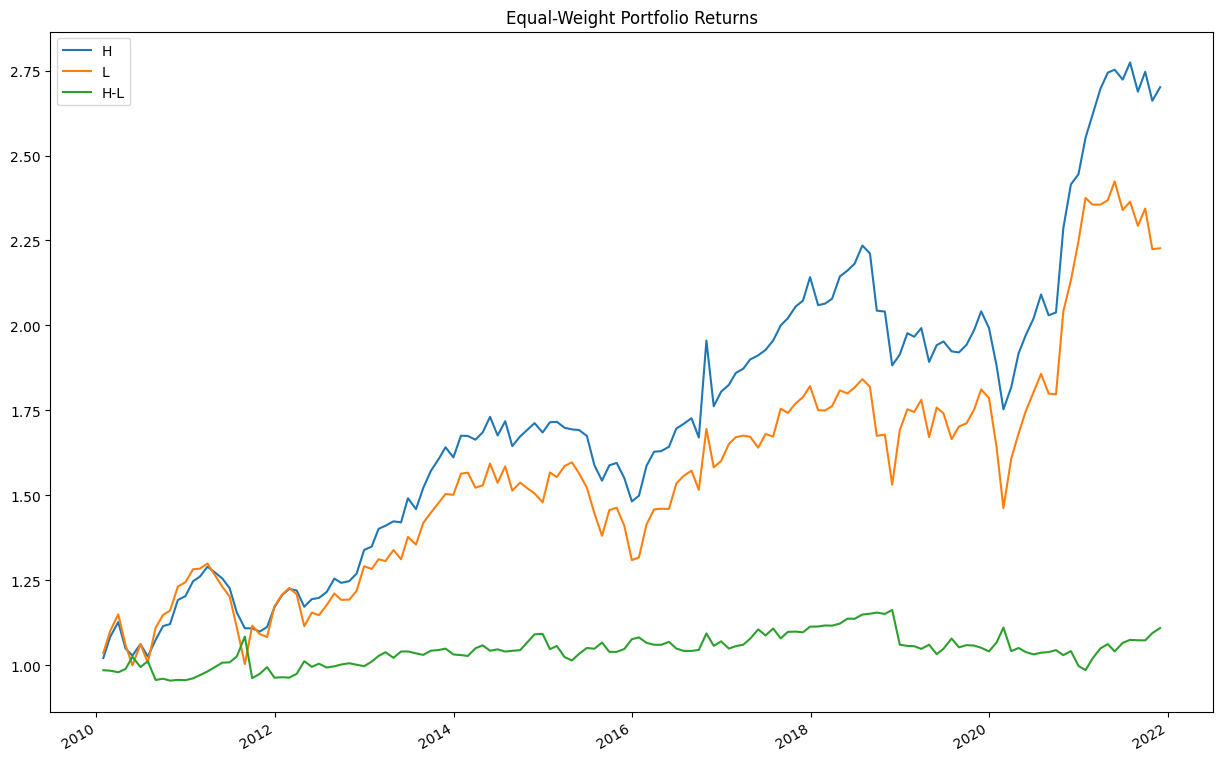

<Axes: title={'center': 'Value-Weight Portfolio Returns'}>

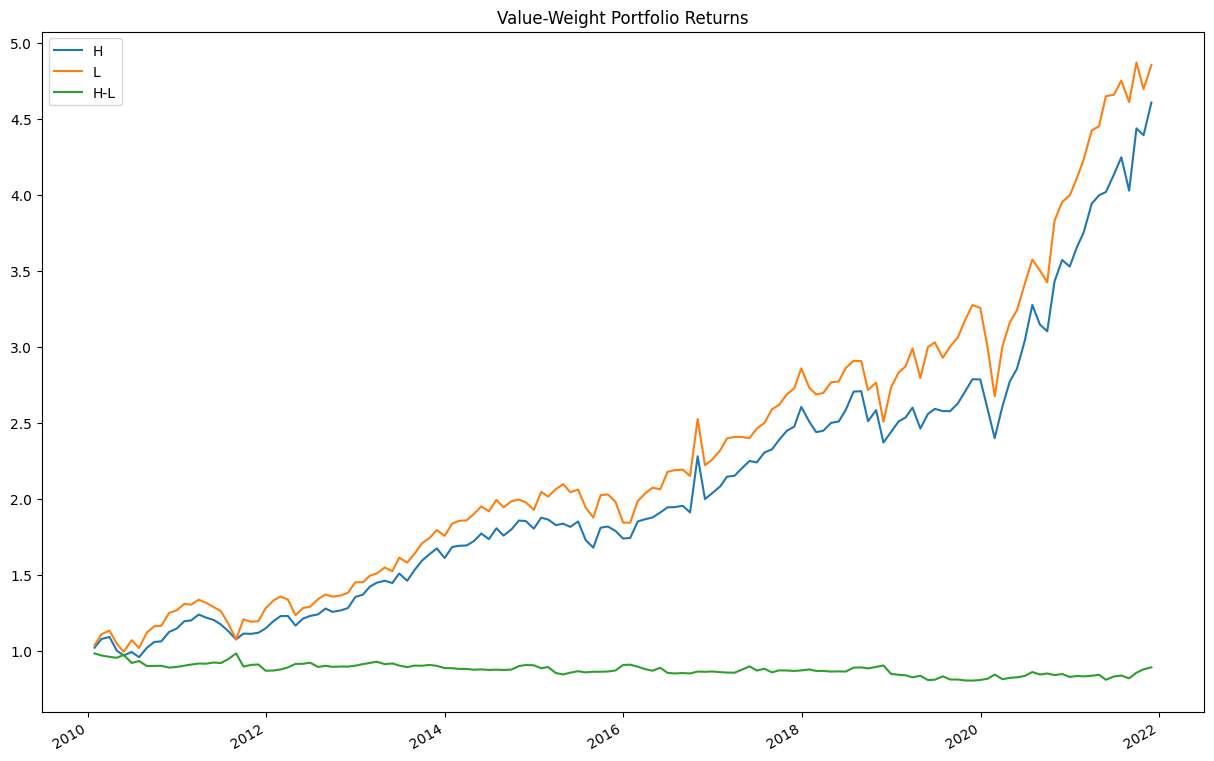

In [19]:
r_h_ew = []; r_l_ew = []  # Equal-weight returns
r_h_vw = []; r_l_vw = []  # Value-weight returns

# Iterate through each month in the test period
for m, test_m in test.groupby('date'):
    x_test_m = test_m[x_cols].values
    
    # Predict using the stacking model
    y_pred = stacker.predict(x_test_m)
    hidx = y_pred == 0  # Indices of highest return class
    lidx = y_pred == 9  # Indices of lowest return class
    
    # Get returns of 'H' and 'L' classes
    rh = test_m.loc[hidx, 'tgt_ret']
    rl = test_m.loc[lidx, 'tgt_ret']

    print(f'{m} Number of stocks in H and L: {hidx.sum()}, {lidx.sum()}')

    # Calculate equal-weight portfolio returns
    wh_ew = np.ones(len(rh)) / len(rh) if len(rh) > 0 else np.zeros(len(rh))
    wl_ew = np.ones(len(rl)) / len(rl) if len(rl) > 0 else np.zeros(len(rl))
    r_h_ew.append(np.dot(wh_ew, rh))
    r_l_ew.append(np.dot(wl_ew, rl))

    # Calculate value-weight portfolio returns
    sizeh = np.exp(test_m.loc[hidx, 'size'])
    sizel = np.exp(test_m.loc[lidx, 'size'])
    wh_vw = sizeh / np.sum(sizeh) if np.sum(sizeh) > 0 else np.zeros(len(sizeh))
    wl_vw = sizel / np.sum(sizel) if np.sum(sizel) > 0 else np.zeros(len(sizel))
    r_h_vw.append(np.dot(wh_vw, rh))
    r_l_vw.append(np.dot(wl_vw, rl))

# Convert lists to numpy arrays for further analysis
r_h_ew = np.array(r_h_ew)
r_l_ew = np.array(r_l_ew)
r_hl_ew = r_h_ew - r_l_ew  # Long-short equal-weight returns
r_h_vw = np.array(r_h_vw)
r_l_vw = np.array(r_l_vw)
r_hl_vw = r_h_vw - r_l_vw  # Long-short value-weight returns

# Function to calculate annualized Sharpe ratio, assuming risk-free rate is 0
def annualized_sharpe(r_p, periods_per_year):
    mean_r = np.mean(r_p)
    std_r = np.std(r_p)
    sharpe = (mean_r / std_r) * np.sqrt(periods_per_year) if std_r != 0 else 0
    return sharpe

def evaluate(r_p, periods_per_year=12):  # assuming monthly returns for periods_per_year
    cum_r = (1 + r_p).prod() - 1
    mean_r = np.mean(r_p)
    std_r = np.std(r_p)
    sharpe = annualized_sharpe(r_p, periods_per_year)
    return [cum_r, mean_r, std_r, sharpe]

# Store evaluation results in a DataFrame
pftab = pd.DataFrame(index=['cum', 'mean', 'std', 'Sharpe'], columns=['EW_H', 'EW_L', 'EW_HL', 'VW_H', 'VW_L', 'VW_HL'])
pftab.loc[:, 'EW_H'] = evaluate(r_h_ew)
pftab.loc[:, 'EW_L'] = evaluate(r_l_ew)
pftab.loc[:, 'EW_HL'] = evaluate(r_hl_ew)
pftab.loc[:, 'VW_H'] = evaluate(r_h_vw)
pftab.loc[:, 'VW_L'] = evaluate(r_l_vw)
pftab.loc[:, 'VW_HL'] = evaluate(r_hl_vw)

print(pftab)

# Plotting cumulative returns
cumret = pd.DataFrame({'H': (1 + r_h_ew).cumprod(), 'L': (1 + r_l_ew).cumprod(), 'H-L': (1 + r_hl_ew).cumprod()}, index=test['date'].unique())
cumret.plot(title='Equal-Weight Portfolio Returns')
plt.show()

cumret = pd.DataFrame({'H': (1 + r_h_vw).cumprod(), 'L': (1 + r_l_vw).cumprod(), 'H-L': (1 + r_hl_vw).cumprod()}, index=test['date'].unique())
cumret.plot(title='Value-Weight Portfolio Returns')
plt.show()

2010-01-29 00:00:00 Number of stocks in H and L: 1502, 4613
2010-02-26 00:00:00 Number of stocks in H and L: 2733, 3182
2010-03-31 00:00:00 Number of stocks in H and L: 2779, 2888
2010-04-30 00:00:00 Number of stocks in H and L: 3201, 2788
2010-05-28 00:00:00 Number of stocks in H and L: 717, 5621
2010-06-30 00:00:00 Number of stocks in H and L: 999, 5215
2010-07-30 00:00:00 Number of stocks in H and L: 2243, 3726
2010-08-31 00:00:00 Number of stocks in H and L: 1253, 4964
2010-09-30 00:00:00 Number of stocks in H and L: 2964, 2872
2010-10-29 00:00:00 Number of stocks in H and L: 2428, 3675
2010-11-30 00:00:00 Number of stocks in H and L: 1999, 4222
2010-12-31 00:00:00 Number of stocks in H and L: 3279, 2761
2011-01-31 00:00:00 Number of stocks in H and L: 2335, 3874
2011-02-28 00:00:00 Number of stocks in H and L: 3225, 2694
2011-03-31 00:00:00 Number of stocks in H and L: 2431, 3466
2011-04-29 00:00:00 Number of stocks in H and L: 2917, 3174
2011-05-31 00:00:00 Number of stocks in H 

<Axes: title={'center': 'Equal-Weight Portfolio Returns'}>

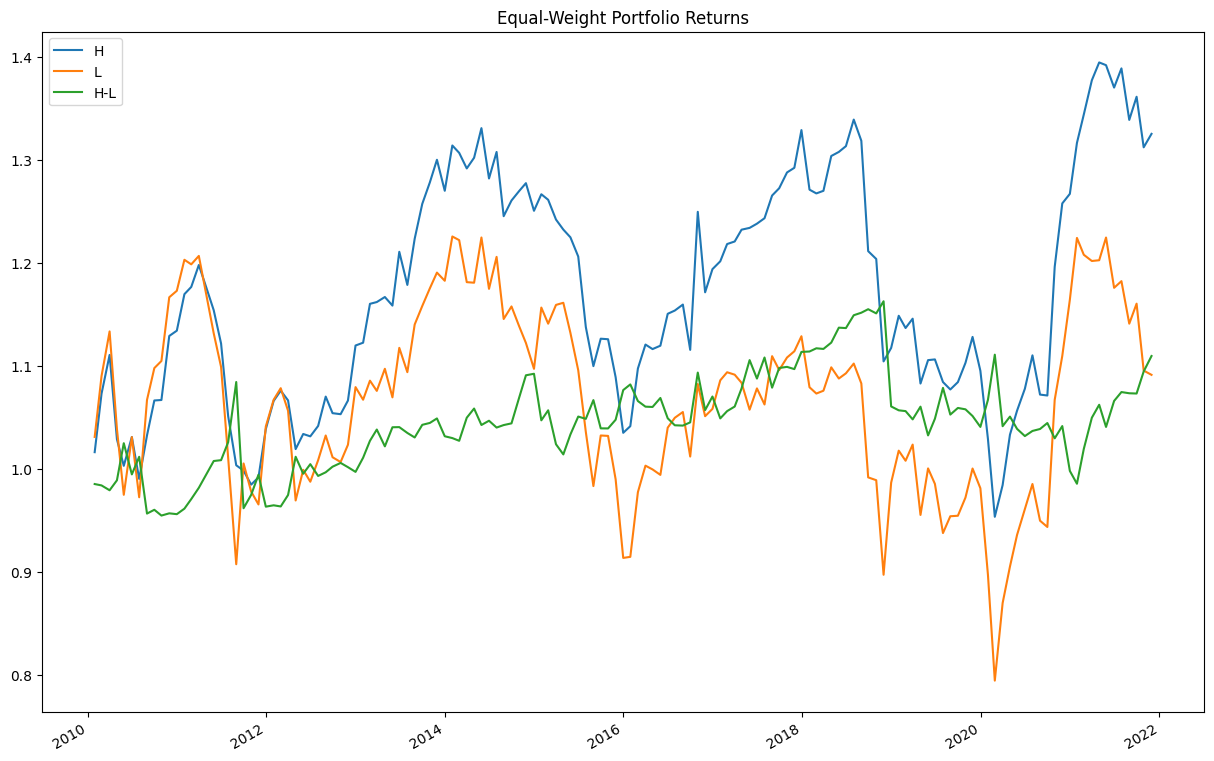

<Axes: title={'center': 'Value-Weight Portfolio Returns'}>

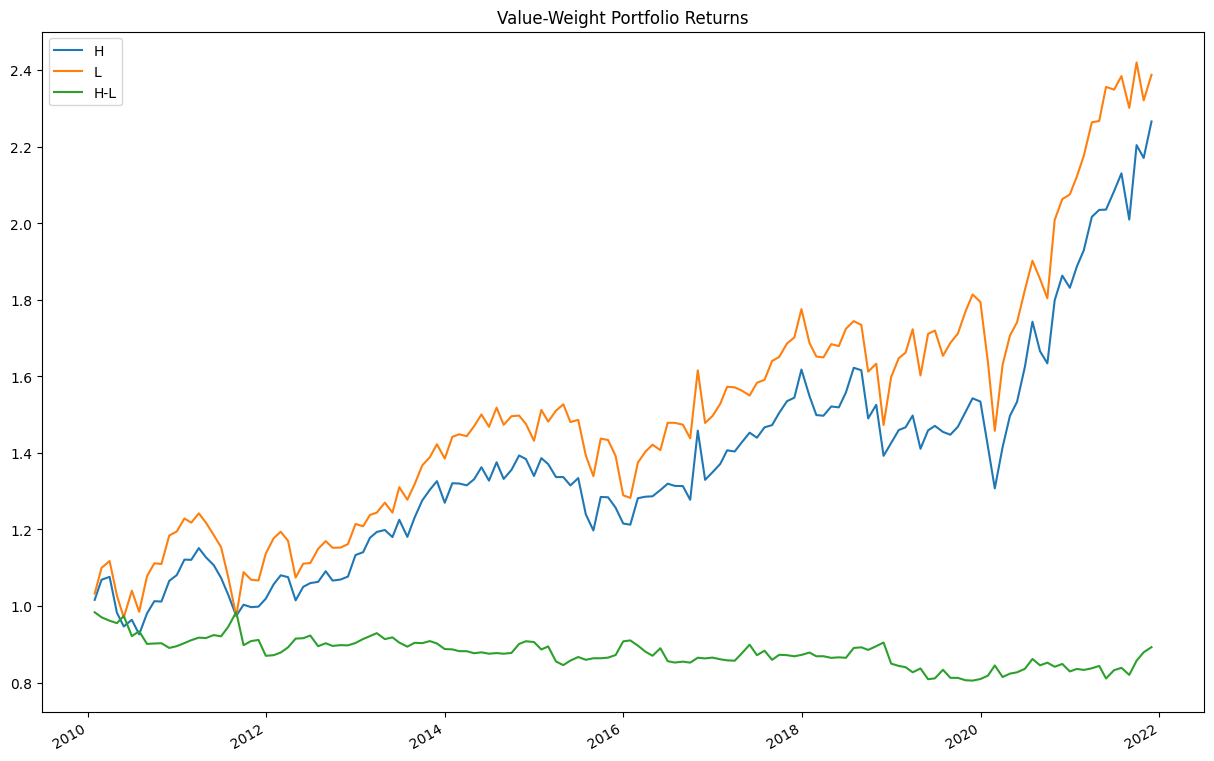

In [20]:
r_h_ew = []; r_l_ew = []  # Equal-weight returns
r_h_vw = []; r_l_vw = []  # Value-weight returns

transaction_cost = 0.005

# Iterate through each month in the test period
for m, test_m in test.groupby('date'):
    x_test_m = test_m[x_cols].values
    
    # Predict using the stacking model
    y_pred = stacker.predict(x_test_m)
    hidx = y_pred == 0  # Indices of highest return class
    lidx = y_pred == 9  # Indices of lowest return class
    
    # Get returns of 'H' and 'L' classes
    rh = test_m.loc[hidx, 'tgt_ret']
    rl = test_m.loc[lidx, 'tgt_ret']
    
    rh_net = rh- transaction_cost
    rl_net = rl- transaction_cost

    print(f'{m} Number of stocks in H and L: {hidx.sum()}, {lidx.sum()}')

    # Calculate equal-weight portfolio returns
    wh_ew = np.ones(len(rh_net)) / len(rh_net) if len(rh_net) > 0 else np.zeros(len(rh_net))
    wl_ew = np.ones(len(rl_net)) / len(rl_net) if len(rl_net) > 0 else np.zeros(len(rl_net))
    r_h_ew.append(np.dot(wh_ew, rh_net))
    r_l_ew.append(np.dot(wl_ew, rl_net))

    # Calculate value-weight portfolio returns
    sizeh = np.exp(test_m.loc[hidx, 'size'])
    sizel = np.exp(test_m.loc[lidx, 'size'])
    wh_vw = sizeh / np.sum(sizeh) if np.sum(sizeh) > 0 else np.zeros(len(sizeh))
    wl_vw = sizel / np.sum(sizel) if np.sum(sizel) > 0 else np.zeros(len(sizel))
    r_h_vw.append(np.dot(wh_vw, rh_net))
    r_l_vw.append(np.dot(wl_vw, rl_net))

# Convert lists to numpy arrays for further analysis
r_h_ew = np.array(r_h_ew)
r_l_ew = np.array(r_l_ew)
r_hl_ew = r_h_ew - r_l_ew  # Long-short equal-weight returns
r_h_vw = np.array(r_h_vw)
r_l_vw = np.array(r_l_vw)
r_hl_vw = r_h_vw - r_l_vw  # Long-short value-weight returns

# Function to calculate annualized Sharpe ratio, assuming risk-free rate is 0
def annualized_sharpe(r_p, periods_per_year):
    mean_r = np.mean(r_p)
    std_r = np.std(r_p)
    sharpe = (mean_r / std_r) * np.sqrt(periods_per_year) if std_r != 0 else 0
    return sharpe

def evaluate(r_p, periods_per_year=12):  # assuming monthly returns for periods_per_year
    cum_r = (1 + r_p).prod() - 1
    mean_r = np.mean(r_p)
    std_r = np.std(r_p)
    sharpe = annualized_sharpe(r_p, periods_per_year)
    return [cum_r, mean_r, std_r, sharpe]

# Store evaluation results in a DataFrame
pftab = pd.DataFrame(index=['cum', 'mean', 'std', 'Sharpe'], columns=['EW_H', 'EW_L', 'EW_HL', 'VW_H', 'VW_L', 'VW_HL'])
pftab.loc[:, 'EW_H'] = evaluate(r_h_ew)
pftab.loc[:, 'EW_L'] = evaluate(r_l_ew)
pftab.loc[:, 'EW_HL'] = evaluate(r_hl_ew)
pftab.loc[:, 'VW_H'] = evaluate(r_h_vw)
pftab.loc[:, 'VW_L'] = evaluate(r_l_vw)
pftab.loc[:, 'VW_HL'] = evaluate(r_hl_vw)

print(pftab)

# Plotting cumulative returns
cumret = pd.DataFrame({'H': (1 + r_h_ew).cumprod(), 'L': (1 + r_l_ew).cumprod(), 'H-L': (1 + r_hl_ew).cumprod()}, index=test['date'].unique())
cumret.plot(title='Equal-Weight Portfolio Returns')
plt.show()

cumret = pd.DataFrame({'H': (1 + r_h_vw).cumprod(), 'L': (1 + r_l_vw).cumprod(), 'H-L': (1 + r_hl_vw).cumprod()}, index=test['date'].unique())
cumret.plot(title='Value-Weight Portfolio Returns')
plt.show()